### Seeding for Reproducibility

In [1]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

### Importing dependencies

In [2]:
import os
import kaggle
import json
from zipfile import ZipFile
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

### Data Curation

In [3]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors




  0%|          | 0.00/2.70G [00:00<?, ?B/s]
  0%|          | 1.00M/2.70G [00:01<1:31:09, 530kB/s]
  0%|          | 2.00M/2.70G [00:02<57:01, 846kB/s]  
  0%|          | 3.00M/2.70G [00:03<45:46, 1.05MB/s]
  0%|          | 4.00M/2.70G [00:04<40:06, 1.20MB/s]
  0%|          | 5.00M/2.70G [00:04<33:10, 1.45MB/s]
  0%|          | 6.00M/2.70G [00:04<26:15, 1.83MB/s]
  0%|          | 7.00M/2.70G [00:05<21:51, 2.20MB/s]
  0%|          | 8.00M/2.70G [00:05<21:05, 2.28MB/s]
  0%|          | 9.00M/2.70G [00:05<18:26, 2.61MB/s]
  0%|          | 10.0M/2.70G [00:06<15:58, 3.01MB/s]
  0%|          | 11.0M/2.70G [00:06<13:53, 3.46MB/s]
  0%|          | 12.0M/2.70G [00:06<13:51, 3.47MB/s]
  0%|          | 13.0M/2.70G [00:06<12:40, 3.79MB/s]
  1%|          | 14.0M/2.70G [00:06<11:58, 4.01MB/s]
  1%|          | 15.0M/2.70G [00:07<12:13, 3.93MB/s]
  1%|          | 16.0M/2.70G [00:07<13:09, 3.65MB/s]
  1%|          | 17.0M/2.70G [00:08<15:28, 3.10MB/s]
  1%|          | 18.0M/2.70G [00:08<13:31, 3.55MB/s]

In [4]:
with ZipFile("new-plant-diseases-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [3]:
print(len(os.listdir("New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train")))
print(os.listdir("New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train")[:5])

print(len(os.listdir("New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid")))
print(os.listdir("New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid")[:5])

print(len(os.listdir("test/test")))
print(os.listdir("test/test")[:5])

38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
33
['AppleCedarRust1.JPG', 'AppleCedarRust2.JPG', 'AppleCedarRust3.JPG', 'AppleCedarRust4.JPG', 'AppleScab1.JPG']


#### Number of classes=38

## Data Preprocessing

In [3]:
#Dataset path
base_dir_train='New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

base_dir_val='New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

(256, 256, 3)


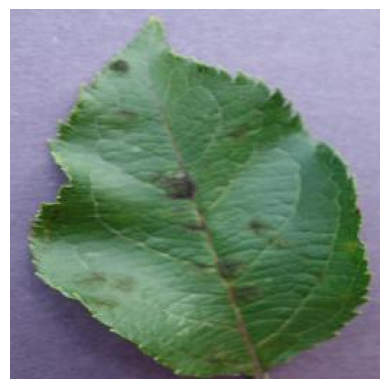

In [4]:
image_path = 'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

## Generators

In [5]:
from tensorflow import keras

# Train Generator
train_ds=keras.utils.image_dataset_from_directory(
    directory='New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(256,256)
)
# Validation Generator
validation_ds=keras.utils.image_dataset_from_directory(
    directory='New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(256,256)
)

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [6]:
def process(image,label):
    image=tf.cast(image/255,tf.float32)
    return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

## Primary Model

In [12]:
num_classes=38

model1=models.Sequential()

model1.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)))
model1.add(layers.MaxPooling2D(2,2))

model1.add(layers.Conv2D(64,(3,3),activation='relu'))
model1.add(layers.MaxPooling2D(2,2))

model1.add(layers.Flatten())
model1.add(layers.Dense(256,activation='relu'))
model1.add(layers.Dense(num_classes,activation='softmax'))

In [14]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dense (Dense)               (None, 256)              

In [15]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
h=model1.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
2197/2197 [==============================] - 298s 132ms/step - loss: 0.8984 - accuracy: 0.7415 - val_loss: 0.4352 - val_accuracy: 0.8588
Epoch 2/5
2197/2197 [==============================] - 287s 131ms/step - loss: 0.2236 - accuracy: 0.9273 - val_loss: 0.4203 - val_accuracy: 0.8778
Epoch 3/5
2197/2197 [==============================] - 283s 129ms/step - loss: 0.1203 - accuracy: 0.9611 - val_loss: 0.6031 - val_accuracy: 0.8514
Epoch 4/5
2197/2197 [==============================] - 282s 128ms/step - loss: 0.0833 - accuracy: 0.9737 - val_loss: 0.5910 - val_accuracy: 0.8638
Epoch 5/5
2197/2197 [==============================] - 284s 129ms/step - loss: 0.0686 - accuracy: 0.9780 - val_loss: 0.5761 - val_accuracy: 0.8758


In [18]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model1.evaluate(validation_ds)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
550/550 [==============================] - 20s 36ms/step - loss: 0.5761 - accuracy: 0.8758
Validation Accuracy: 87.58%


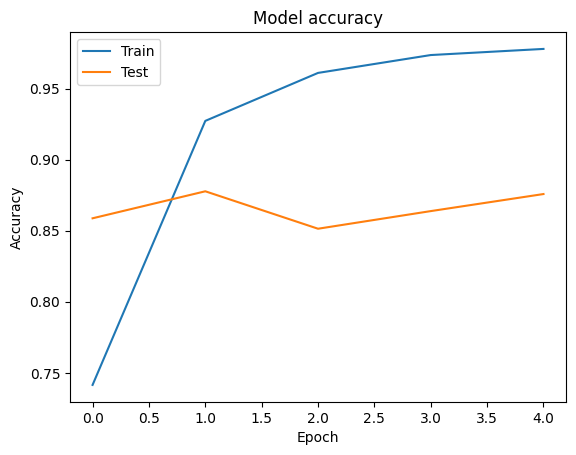

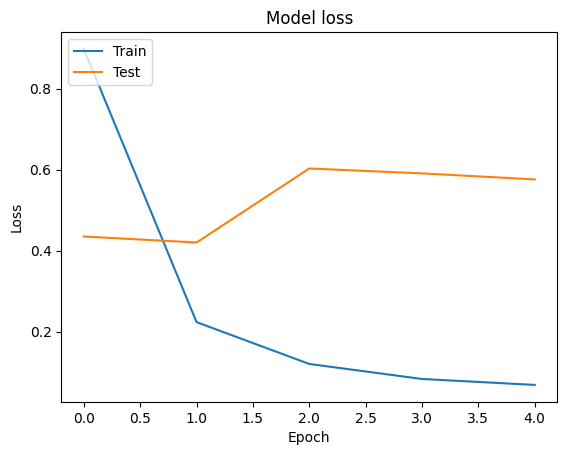

In [19]:
# Plot training & validation accuracy values
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [33]:
model1.save('model1.h5')

## Predictive System

In [21]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(256, 256)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img=img.resize((224,224)) #For VGG Model
    #img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [22]:
# Extract class names from the directory structure
directory = 'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
class_names = sorted([d.name for d in os.scandir(directory) if d.is_dir()])

# Create a mapping from class names to indices
class_indices = {class_name: idx for idx, class_name in enumerate(class_names)}

inverted_class_indices = {v: k for k, v in class_indices.items()}
class_indices=inverted_class_indices

In [19]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [29]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [29]:
# Example Usage
#image_path = 'test/test/AppleCedarRust1.JPG'
image_path = 'test/test/PotatoEarlyBlight3.JPG'
#image_path = 'test/test/CornCommonRust2.JPG'

predicted_class_name = predict_image_class(model2, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 [==============================] - 0s 17ms/step
Predicted Class Name: Tomato___Late_blight


## VGG19 Model

In [5]:
from tensorflow.keras.applications.vgg19 import VGG19

In [6]:
vgg=VGG19()

In [7]:
from tensorflow import keras

# Train Generator
train_ds=keras.utils.image_dataset_from_directory(
    directory='New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(224,224)
)
# Validation Generator
validation_ds=keras.utils.image_dataset_from_directory(
    directory='New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(224,224)
)

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [8]:
vgg.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
from tensorflow.keras import Sequential
model2=Sequential()

In [10]:
models=vgg.layers[:-1]
for layer in models:
    model2.add(layer)

In [11]:
for layer in model2.layers[:-1]:
    layer.trainable=False

In [12]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [13]:
num_classes=38

model2.add(layers.Dense(256,activation='relu'))
model2.add(layers.Dense(num_classes,activation='softmax'))

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [14]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
h=model2.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
2197/2197 [==============================] - 442s 198ms/step - loss: 0.6391 - accuracy: 0.8493 - val_loss: 0.3980 - val_accuracy: 0.8705
Epoch 2/5
2197/2197 [==============================] - 433s 197ms/step - loss: 0.2163 - accuracy: 0.9298 - val_loss: 0.2676 - val_accuracy: 0.9191
Epoch 3/5
2197/2197 [==============================] - 431s 196ms/step - loss: 0.1669 - accuracy: 0.9465 - val_loss: 0.2972 - val_accuracy: 0.9214
Epoch 4/5
2197/2197 [==============================] - 431s 196ms/step - loss: 0.1332 - accuracy: 0.9580 - val_loss: 0.2256 - val_accuracy: 0.9379
Epoch 5/5
2197/2197 [==============================] - 434s 198ms/step - loss: 0.1126 - accuracy: 0.9656 - val_loss: 0.2553 - val_accuracy: 0.9373


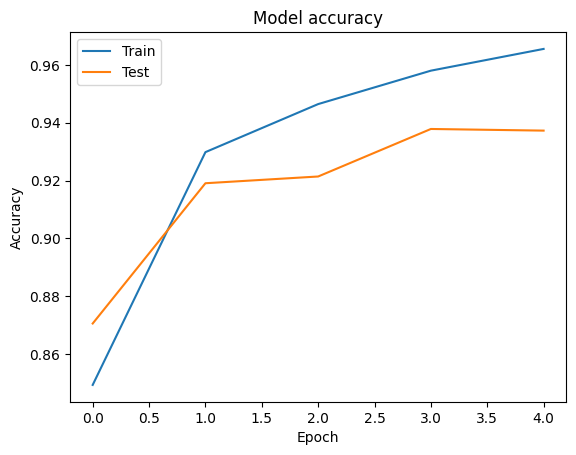

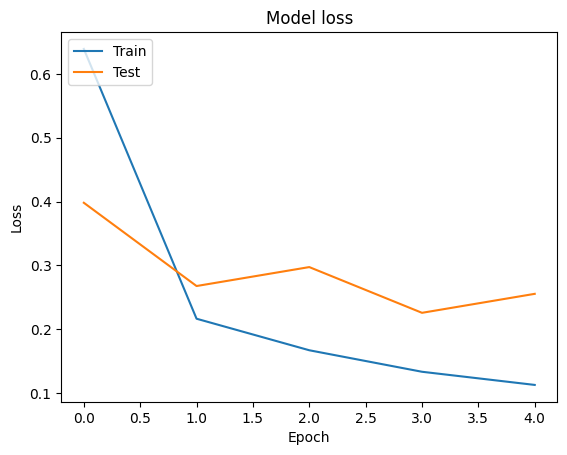

In [16]:
# Plot training & validation accuracy values
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [26]:
model2.save('model2.h5')

## VGG19 Imagenet Model

In [81]:
from tensorflow.keras.applications.vgg19 import VGG19

In [82]:
vgg=VGG19(include_top=False,
    weights="imagenet",input_shape=(224,224,3))

In [83]:
from tensorflow import keras

# Train Generator
train_ds=keras.utils.image_dataset_from_directory(
    directory='New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(224,224)
)
# Validation Generator
validation_ds=keras.utils.image_dataset_from_directory(
    directory='New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(224,224)
)

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [84]:
vgg.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [85]:
from tensorflow.keras import Sequential
model3=Sequential()

In [86]:
models=vgg.layers
for layer in models:
    model3.add(layer)

In [77]:
for layer in model3.layers:
    layer.trainable=False

In [87]:
num_classes=38

model3.add(layers.Flatten())
model3.add(layers.Dense(256,activation='relu'))
model3.add(layers.Dense(num_classes,activation='softmax'))

model3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [88]:
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [89]:
h=model3.fit(train_ds,epochs=8,validation_data=validation_ds)

Epoch 1/8
  32/2197 [..............................] - ETA: 21:04 - loss: 6.6142 - accuracy: 0.0303

KeyboardInterrupt: 